# Assignment 1 - Image Deblurring

Name: <br>
Matriculation number:

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

from hessian_matrix import hessian_matrix

## Test Image

You can use the following function to create a synthetic image:



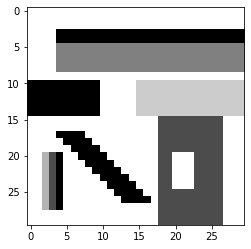

In [3]:
def create_random_binary_img_1():
    
    u = np.random.randint(1,2, 30*30).reshape(30,30).astype(np.float)

    u[5:9,4:] = 0.5
    u[3:5,4:] = 0
    u[10:15,:10] = 0
    u[10:15,15:] = 0.8
    u[15:, 18:27] = 0.3

    for i in range(10):
        u[i+17,i+4:i+8]  = 0
    
    u[20:25:, 20:23] = 1    
    u[20:28,4] = 0
    u[20:28,3] = 0.3
    u[20:28,2] = 0.7

    return u

sample_image = create_random_binary_img_1()

plt.imshow(sample_image, cmap ="gray")
plt.show()

## hessian_matrix() function

We provide the implementation of the hessian matrix for $k = 0, 1, 2, 3$.

input variables: 
- u: your image
- reg: regularization parameter
- k: one of the four kernel types 0-3 

Example usage:

In [4]:
u_ex = np.zeros(9).reshape(3,3)
reg_ex = 1
k_type_ex = 3
A = hessian_matrix(u_ex, reg_ex, k_type_ex)
A_n_t = A.toarray()
print(A_n_t)

[[ 4.  -2.   0.  -2.   0.   0.   0.   0.   0. ]
 [-2.   6.5 -2.   0.5 -2.   0.   0.   0.   0. ]
 [ 0.  -2.   4.5  0.   0.5 -2.   0.   0.   0. ]
 [-2.   0.5  0.   6.5 -2.   0.  -2.   0.   0. ]
 [ 0.  -2.   0.5 -2.   9.  -2.   0.5 -2.   0. ]
 [ 0.   0.  -2.   0.  -2.   6.5  0.   0.5 -2. ]
 [ 0.   0.   0.  -2.   0.5  0.   4.5 -2.   0. ]
 [ 0.   0.   0.   0.  -2.   0.5 -2.   6.5 -2. ]
 [ 0.   0.   0.   0.   0.  -2.   0.  -2.   4. ]]


## Implementation

In [ ]:
def GD(g, reg_lambda = 0.01):
    """
    Gradient Descent algorithm
    g: grayscale blurry image of size (M, N)
    reg_lambda: regularization parameter
    """
    u = g  # TODO: replace with actual implementation
    return u

In [ ]:
def LGS(g, reg_lambda):
    """
    Linearalized Gauss Seidel Algortihm
    g: grayscale blurry image of size (M, N)
    reg_lambda: regularization parameter
    """
    u = g  # TODO: replace with actual implementation
    return u

In [ ]:
def LSOR(g, reg_lambda, w):
    """
    Linearized SOR Algorithm
    g: grayscale blyrry image of size (M, N)
    reg_lambda: regularization parameter
    w: SOR parameter
    """
    u = g  # TODO: replace with actual implementation
    return u

### Parameters

In [ ]:
reg_lambda = 0.001 # lambda regularization parameter. you need to play with this 
# k matrix. Look below how to choose it 
k = 0


$k =0 \longrightarrow \begin{bmatrix}\frac{1}{2} & \frac{1}{2} \\0&0\end{bmatrix} \hspace{1cm} k =1 \longrightarrow  \begin{bmatrix}\frac{1}{2} & 0 \\\frac{1}{2}&0\end{bmatrix} \hspace{1cm} k =2 \longrightarrow \begin{bmatrix}\frac{1}{2} & 0 \\0&\frac{1}{2}\end{bmatrix}   \hspace{1cm} k =3 \longrightarrow \begin{bmatrix}0 & \frac{1}{2} \\ \frac{1}{2}&0\end{bmatrix}$



### Reading image

You are provided with only the synthetic image. 
The purpose of using a synthetic image is to see possible changes in the deblurred image after applying your algorithm. 
You can convolve the original image using the [scipy library](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html).
Note that you must choose **valid** as the mode in your convolution.

In [ ]:
img_org = sample_image = create_random_binary_img_1()

# TODO: define the kernel matrix here
kernel = None

# TODO: blur this image
img_blurred = sample_image

## GRADIENT DESCENT

In [ ]:
# run gradient descent algorithm
img_deblurred_gd = GD(img_blurred, reg_lambda)

# for visualization purpose 
# img_deblurred_gd = np.clip(u_final_gd, 0, 1)


plt.figure(figsize=(15, 5))
ax1 = plt.subplot(1, 3, 1)
plt.imshow(img_blurred, cmap='gray')
ax2 = plt.subplot(1, 3, 2)
plt.imshow(img_deblurred_gd, cmap='gray')
ax3 = plt.subplot(1, 3, 3)
plt.imshow(img_org, cmap='gray')

ax1.set_title("Blurred Image")
ax2.set_title("Deblurred Image - GD")
ax3.set_title("Original - Sharp Image")
plt.show()

print(f"For lambda {reg_lambda:.5f}\t \nk_type {k:1d}")

# TODO: print the loss
print(f"Loss Data Term = ")

# TODO: print the error
print("Sum of Squared Distance: deblurred vs. original = ")  

## SOR

In [ ]:
w = 0.3 #play with this

# run LSOR algorithm
img_deblurred_sor = LSOR(img_blurred, reg_lambda, w)


plt.figure(figsize=(15, 5))
ax1 = plt.subplot(1, 3, 1)
plt.imshow(img_blurred, cmap='gray')
ax2 = plt.subplot(1, 3, 2)
plt.imshow(img_deblurred_sor, cmap='gray')
ax3 = plt.subplot(1, 3, 3)
plt.imshow(img_org,cmap='gray')

ax1.set_title("Blurred Image")
ax2.set_title("Deblurred Image - LSOR")
ax3.set_title("Original - Sharp Image")
#plt.savefig("results_"+str(k)+".png")
plt.show()

print(f"For lambda {reg_lambda:.5f}")

# TODO: print the loss
print(f"Loss Data Term = ")

# TODO: print the error
print("Sum of Squared Distance: deblurred vs. original = ")  

## GAUSS - SEIDEL

In [ ]:
nb_iter = 1

# run LGS algorithm
img_deblurred_gs = LGS(img_blurred, reg_lambda)


plt.figure(figsize=(15, 5))
ax1 = plt.subplot(1, 3, 1)
plt.imshow(img_blurred, cmap='gray')
ax2 = plt.subplot(1, 3, 2)
plt.imshow(img_deblurred_gs, cmap='gray')
ax3 = plt.subplot(1, 3, 3)
plt.imshow(img_org, cmap='gray')

ax1.set_title("Blurred Image")
ax2.set_title("Deblurred Image - LGS")
ax3.set_title("Original - Sharp Image")
plt.show()

print(f"For lambda {reg_lambda:.5f}")

# TODO: print the loss
print(f"Loss Data Term = ")

# TODO: print the error
print("Sum of Squared Distance: deblurred vs. original = ")  